In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Загрузка данных и постановка задачи
## Цель: выяснить с помощью метода главных компонент, какие написанные от руки цифры наиболее сильно отличаются друг от друга.

#**Представьте, что Вы работаете с задачей распознавания изображений для почтовой компании. 
# Было бы очень полезно читать цифры автоматически, даже если они написаны вручную 
# (сейчас именно так и происходит в почтовых компаниях, причём распознавание цифр работает даже лучше, чем это может делать человек).
#  Руководитель почтовой компании хотел бы выяснить, какие цифры распознаются наиболее сложно, чтобы можно было получить для этих цифр побольше размеченных данных. 
# Вы будете работать с очень известным набором данных, который содержит написанные от руки цифры. 
# С помощью метода главных компонент Вы выясните, какие цифры легче отличимы от других цифр.**
df = pd.read_csv(r'D:\Khabarov\Репозиторий\MachineLearningCourse\DATA\digits.csv')
df.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2


In [3]:
#Создаем датафрейм только с пикселями
pixels = df.drop(labels=['number_label'],axis=1)
pixels

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [4]:
#Преобразуем информацию о пикселях в изображение
#Каждая строка - изображение
single_image = pixels.iloc[0]
single_image

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

In [5]:
#Перевод в numpy массив и изменение формы (хотим массив 8 на 8)
number = single_image.to_numpy().reshape(8,8)
number


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

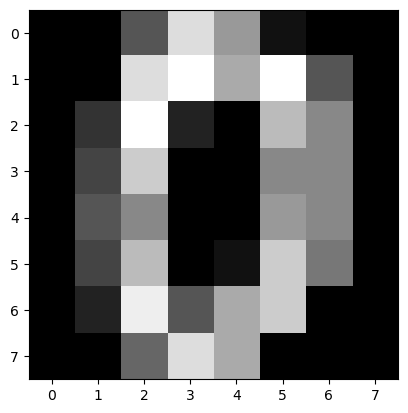

In [6]:
#Визуализация числа
plt.imshow(number,cmap='gray')

<Axes: >

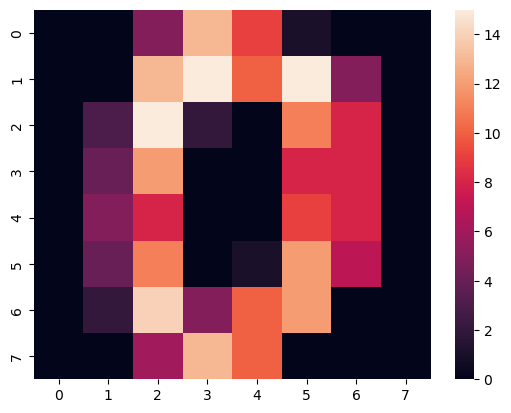

In [7]:
#Второй вариант визуализации
sns.heatmap(number)

In [8]:
#Масштабирование данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_pixels = scaler.fit_transform(pixels)
scaled_pixels

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [9]:
#Создание модели PCA
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
pca_pixels = pca_model.fit_transform(scaled_pixels)
pca_pixels

array([[ 1.91421745, -0.95442192],
       [ 0.58898188,  0.92456018],
       [ 1.30202422, -0.31717272],
       ...,
       [ 1.0225636 , -0.14795425],
       [ 1.07604824, -0.38093491],
       [-1.25772329, -2.2275392 ]])

In [10]:
#Сколько вариативности объясняют новые признаки - 0.2159497047703333
var_ratio = np.sum(pca_model.explained_variance_ratio_)
var_ratio

0.21594970486723977

<Axes: >

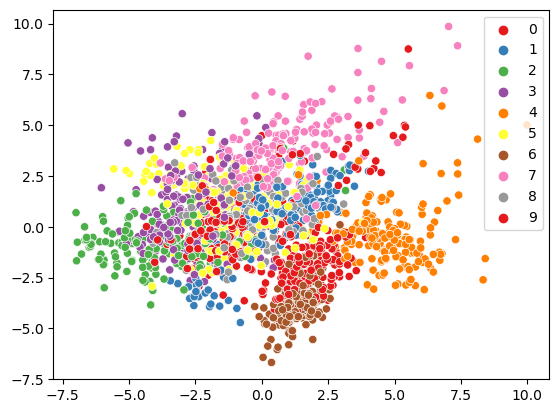

In [11]:
#Какие числа сильно отличаются от других - образуют отчетливый кластер
sns.scatterplot(x=pca_pixels[:,0],y=pca_pixels[:,1],hue=df['number_label'].values,palette='Set1')

In [12]:
# **Задание: постройте "интерактивный" 3D-график с результатыми работы метода главных компонент для 3 главных компонент.
#  Это можно сделать разными способами с помощью различных библиотек, например plotly или bokeh,
#  но на самом деле это можно сделать с помощью только Matplotlib и Jupyter Notebook.
#  При необходимости поищите решение в гугле или другом поисковике или на StackOverflow.**
pca_model = PCA(n_components=3)

In [13]:
pca_pixels = pca_model.fit_transform(scaled_pixels)

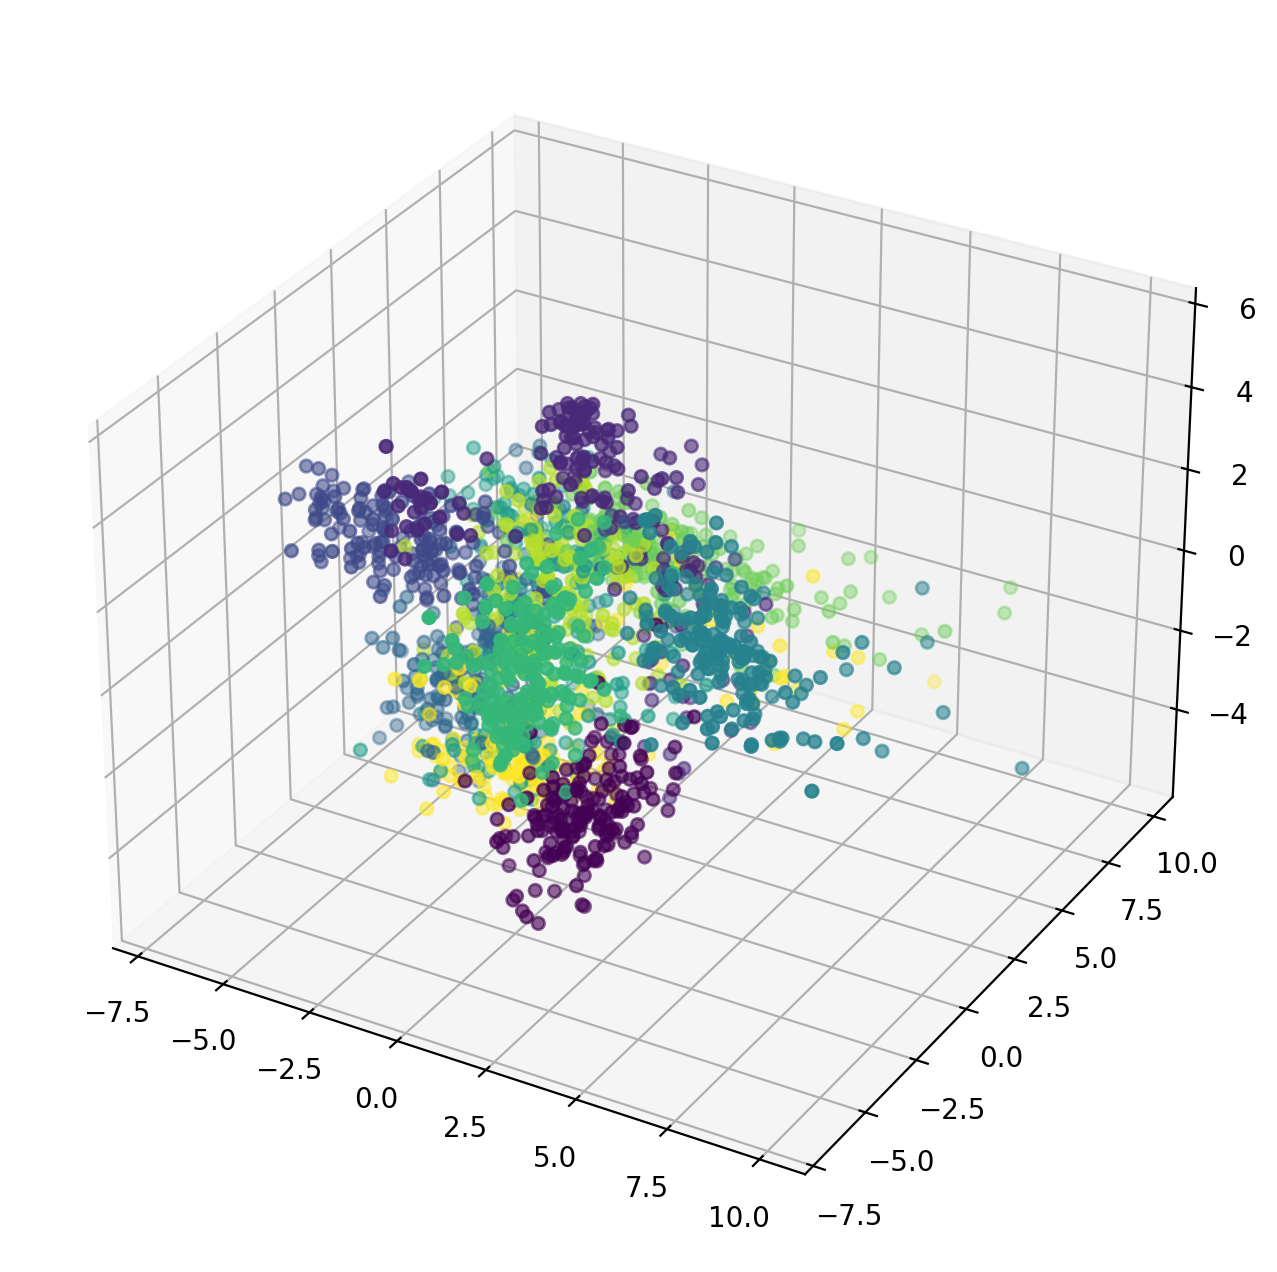

In [14]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(8,8),dpi=200)
ax = plt.axes(projection='3d')
ax.scatter3D(pca_pixels[:,0],pca_pixels[:,1],pca_pixels[:,2],c=df['number_label'])